In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
transform_train = torchvision.transforms.Compose([
  transforms.RandomCrop(32,padding = 4),
  torchvision.transforms.RandomHorizontalFlip(p = 0.5),
  torchvision.transforms.RandomAffine(0,translate=(0.1,0.1)),
  transforms.ToTensor(),
                                                  
]
    
)

In [ ]:
 train_dataset= torchvision.datasets.FashionMNIST(
    root = '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_dataset= torchvision.datasets.FashionMNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [ ]:
train_dataset.train_data.shape

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets.numpy()


array([9, 0, 0, ..., 3, 0, 5])

In [ ]:
#define the model
class CNN(nn.Module):
  def __init__(self,k):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
        nn.Conv2d(in_channels= 1 , out_channels=32, kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels= 32 , out_channels=64, kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels= 64 , out_channels=128, kernel_size=3,stride=2),
        nn.ReLU()

    )
    self.dense_layers = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(128*2*2,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,k)
    )
  def forward(self,X):
    out = self.conv_layers(X)
    out = out.view(out.size(0),-1)
    out = self.dense_layers(out)
    return out


In [ ]:
model = CNN(10)

In [ ]:
#device to gpu
#الان من مدل ران تایم رو بردم رو جی پی یو
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu' )
print(device)
model.to(device)

cuda:0


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:

a = [2,3,4]
b = [3,4,5]
a.append(b)
a

[2, 3, 4, [3, 4, 5]]

In [ ]:
def Batch_Gd(model,criterion, optimizer, train_loader, test_loader, epoch):
  train_losses = []
  test_losses = []
  for it in range(epoch):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      #mode data to gpu
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs,targets)
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    train_loss = np.mean(train_loss)
    test_loss = [ ]
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs,targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epoch},train loss :{train_losses[it]},test loss:{test_losses[it]}, duration = {dt}')  
  return train_losses, test_losses

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train_losses, test_losses = Batch_Gd(model,criterion,optimizer,train_loader,test_loader,5)

Epoch 1/5,train loss :0.3984811284394661,test loss:0.3966045813469947, duration = 0:00:06.181552
Epoch 2/5,train loss :0.35141730311709934,test loss:0.3733461186101165, duration = 0:00:06.179561
Epoch 3/5,train loss :0.3194977272230425,test loss:0.3442020075796526, duration = 0:00:06.136351
Epoch 4/5,train loss :0.293541392251881,test loss:0.338490846224978, duration = 0:00:06.183904
Epoch 5/5,train loss :0.2713878172864792,test loss:0.32483072805253765, duration = 0:00:06.128752


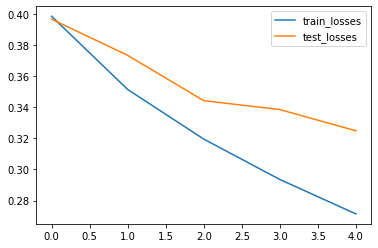

In [ ]:
 plt.plot(train_losses,label = 'train_losses')
plt.plot(test_losses,label = 'test_losses')
plt.legend()
plt.show()   

In [ ]:
n_correct,n_total = 0,0
pre = []
target = []
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    a,prediction = torch.max(outputs,1)
    pre.extend(prediction.tolist())
    target.extend(targets.tolist())
    n_correct += (prediction==targets).sum().item()

    n_total +=targets.shape[0]
acc = n_correct/n_total
print(acc)    
pre = np.array(pre)
target = np.array(target)

0.8776


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pre, target)

In [ ]:
cm

array([[865,   4,  20,  23,   1,   0, 163,   0,   5,   0],
       [  1, 972,   0,   9,   2,   0,   1,   0,   1,   0],
       [ 29,   1, 825,  24,  57,   0,  91,   0,   6,   0],
       [ 20,  14,   6, 878,  35,   2,  22,   0,   8,   0],
       [  1,   2,  82,  24, 827,   0, 123,   0,   5,   0],
       [  2,   0,   0,   0,   0, 975,   0,  28,   3,  11],
       [ 75,   6,  65,  40,  78,   0, 588,   0,   3,   0],
       [  0,   0,   0,   0,   0,  16,   0, 945,   6,  50],
       [  7,   1,   2,   2,   0,   0,  12,   0, 962,   0],
       [  0,   0,   0,   0,   0,   7,   0,  27,   1, 939]])

In [ ]:
labels = '''T-shirt 
Trouser
pullover
dress
coat
sandal
shirt
sniker
bag
ankle boot
'''.split('\n')